# Cleaning and Visualizing Titanic Dataset

## Internship Task 2 – Data Cleaning and Visualization  

**Name:** Abid Ali  
**Company:** Code Sentinel  

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Step 1: Loading and Inspecting the Titanic Dataset 🛳️

In [2]:
# Loading Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 🧹 Step 2: Data Cleaning

In [6]:
# Drop columns with too many nulls
titanic = titanic.drop(columns=['deck'])

In [7]:
# Fill missing age with median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [8]:
# Fill embarked with mode
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

In [16]:
# Confirming Cleanup
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

## 🔢 Step 3: Convert Categorical Columns to Numeric

In [10]:
# Convert 'sex' to numeric: male=0, female=1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

In [11]:
# Convert 'class' to numeric
titanic['class'] = titanic['class'].map({'First': 1, 'Second': 2, 'Third': 3})

## 📈 Step 4: Data Visualization with Matplotlib and Seaborn

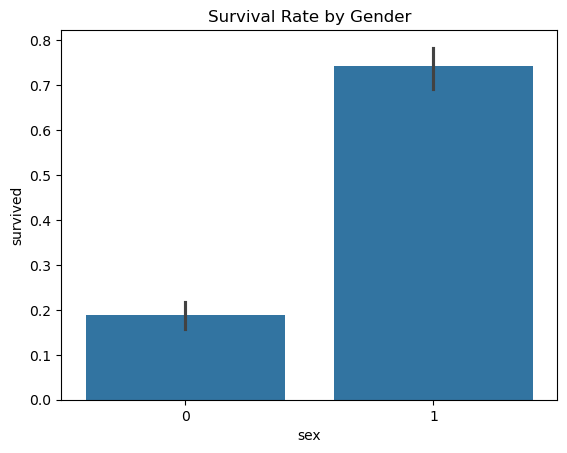

In [12]:
sns.barplot(x="sex", y="survived", data=titanic)
plt.title("Survival Rate by Gender")
plt.show()

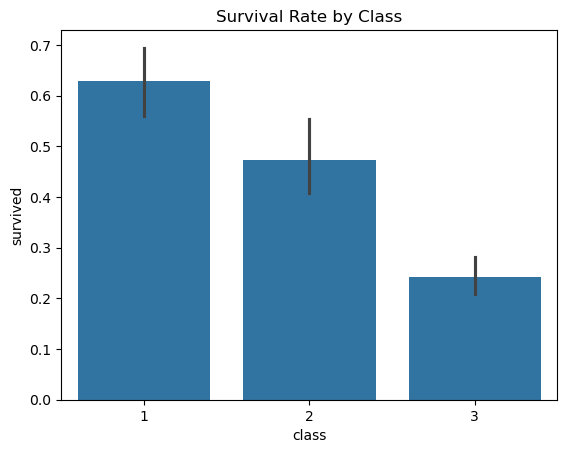

In [13]:
sns.barplot(x="class", y="survived", data=titanic)
plt.title("Survival Rate by Class")
plt.show()

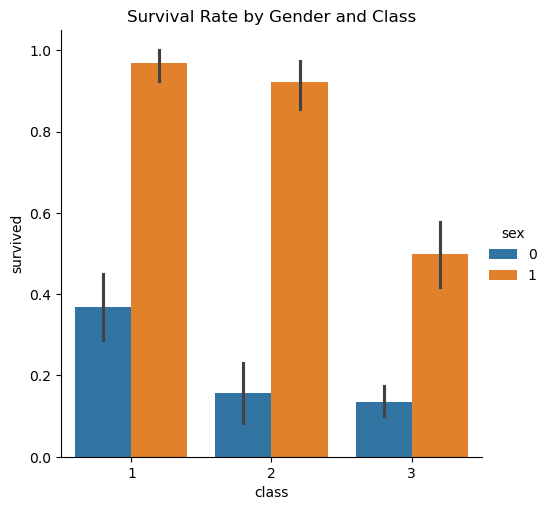

In [14]:
sns.catplot(x="class", y="survived", hue="sex", kind="bar", data=titanic)
plt.title("Survival Rate by Gender and Class")
plt.show()

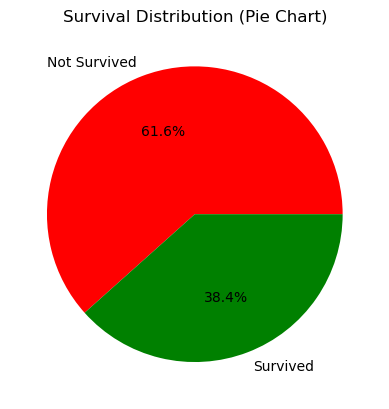

In [17]:
# Pie chart of survival
survived_counts = titanic['survived'].value_counts()
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Survival Distribution (Pie Chart)")
plt.show()

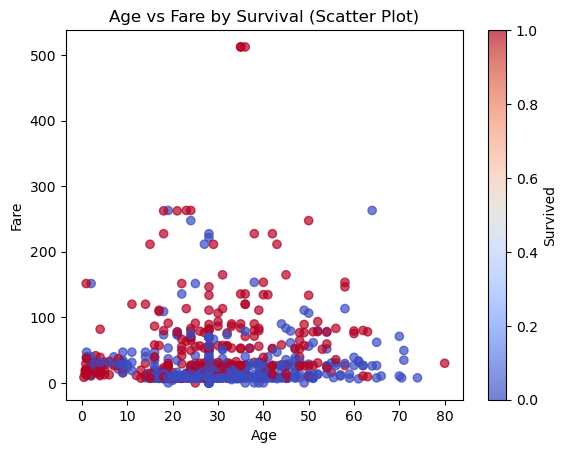

In [19]:
# Scatter plot of age vs fare colored by survival
plt.scatter(titanic['age'], titanic['fare'], c=titanic['survived'], cmap='coolwarm', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare by Survival (Scatter Plot)")
plt.colorbar(label="Survived")
plt.show()